In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt


In [ ]:
stock=pd.read_csv("../../data/Stock Regression/Cleaned/TSLA Cleaned Data 2015-2024.csv")
test=pd.read_csv("../../data/Stock Regression/Cleaned/TSLA training data.csv")
#final=pd.read_csv("filename") once the test data is prepared

In [8]:
mean_open=test["Open"].mean()
test['Open'].fillna({'Open':mean_open},inplace=True)
mean_low=test['Low'].mean()
test['Low'].fillna({'Low':mean_low},inplace=True)

C:\Users\parth\AppData\Local\Temp\ipykernel_3876\742366525.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Open'].fillna({'Open':mean_open},inplace=True)
C:\Users\parth\AppData\Local\Temp\ipykernel_3876\742366525.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [14]:
meanopen=stock['Open'].mean()
meanhigh=stock['High'].mean()
meanlow=stock['Low'].mean()

medianopen=stock['Open'].median()
medianhigh=stock['High'].median()
medianlow=stock['Low'].median()

modeopen=stock['Open'].mode().iloc[0]
modehigh=stock['High'].mode().iloc[0]
modelow=stock['Low'].mode().iloc[0]

print("Mean:",meanopen)
print("Median:",medianopen)
print("Mode:",modeopen)

Mean: 112.661155088853
Median: 25.365000000000002
Mode: 14.87


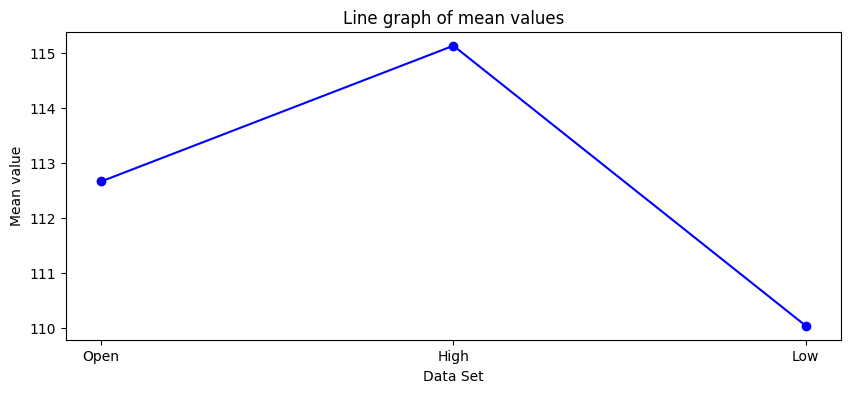

In [11]:
means=[meanopen,meanhigh,meanlow]

plt.figure(figsize=(10,4))
plt.plot(range(len(means)),means,marker='o',linestyle='-',color='b')
plt.xticks(range(len(means)),['Open','High','Low'])
plt.xlabel('Data Set')
plt.ylabel('Mean value')
plt.title('Line graph of mean values')

plt.show()

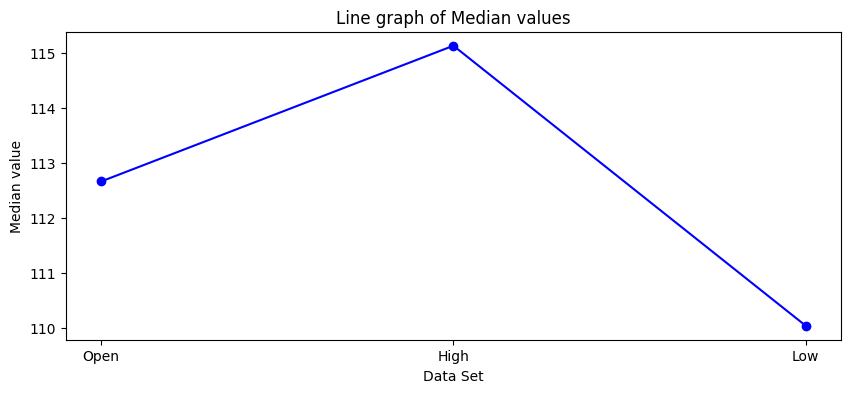

In [13]:
medians=[medianopen,medianhigh,medianlow]

plt.figure(figsize=(10,4))
plt.plot(range(len(medians)),means,marker='o',linestyle='-',color='b')
plt.xticks(range(len(medians)),['Open','High','Low'])
plt.xlabel('Data Set')
plt.ylabel('Median value')
plt.title('Line graph of Median values')

plt.show()

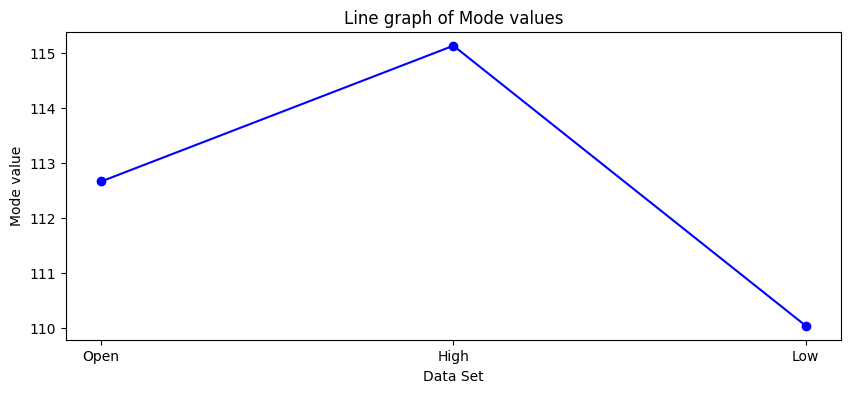

In [15]:
modes=[modeopen,modehigh,modelow]

plt.figure(figsize=(10,4))
plt.plot(range(len(modes)),means,marker='o',linestyle='-',color='b')
plt.xticks(range(len(modes)),['Open','High','Low'])
plt.xlabel('Data Set')
plt.ylabel('Mode value')
plt.title('Line graph of Mode values')

plt.show()

<Figure size 1200x600 with 0 Axes>

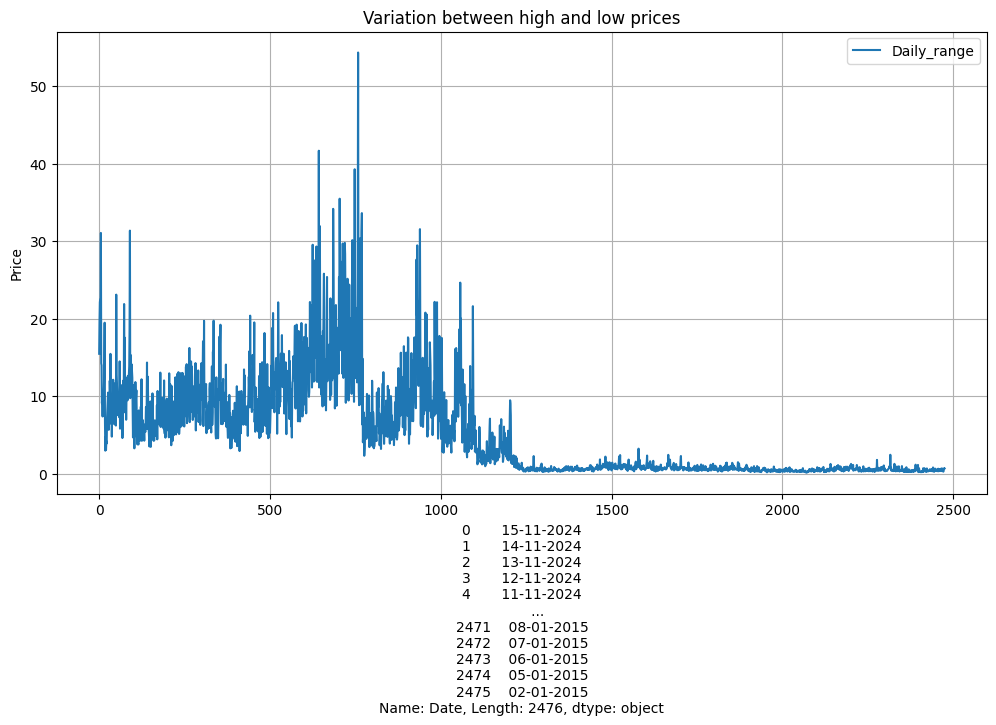

In [18]:
stock['Daily_range']=stock['High']-stock['Low']
test['Daily_range']=test['High']-stock['Low']
plot_cols=['Daily_range']

plt.figure(figsize=(12,6))
stock[plot_cols].plot(kind='line',figsize=(12,6))
plt.xlabel(stock['Date'])
plt.ylabel('Price')

if len(plot_cols)==2:
    plt.lines[0].set_label('High')
    plt.lines[1].set_label('Low')

plt.title("Variation between high and low prices")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
stock.head()

,Unnamed: 0,Date,Price,Open,High,Low,Vol.(Millions),Change,Daily_range
0,0,15-11-2024,320.72,310.57,324.68,309.22,114.44,0.0307,15.46
1,1,14-11-2024,311.18,327.69,329.98,310.37,120.73,-0.0577,19.61
2,2,13-11-2024,330.24,335.85,344.60,322.50,125.41,0.0053,22.10
3,3,12-11-2024,328.49,342.74,345.84,323.31,155.73,-0.0615,22.53
4,4,11-11-2024,350.00,346.30,358.64,336.00,210.52,0.0896,22.64


In [23]:
stock['Volatility']=(stock['High']-stock['Low'])/stock['Open']
test['Volatility']=(test['High']-test['Low'])/test['Open']
stock.head()

,Unnamed: 0,Price,Open,High,Low,Vol.(Millions),Change,Daily_range,Volatility
Date,,,,,,,,,
2024-11-15,0,320.72,310.57,324.68,309.22,114.44,0.0307,15.46,0.049779
2024-11-14,1,311.18,327.69,329.98,310.37,120.73,-0.0577,19.61,0.059843
2024-11-13,2,330.24,335.85,344.60,322.50,125.41,0.0053,22.10,0.065803
2024-11-12,3,328.49,342.74,345.84,323.31,155.73,-0.0615,22.53,0.065735
2024-11-11,4,350.00,346.30,358.64,336.00,210.52,0.0896,22.64,0.065377


In [25]:
correlation=stock.corr()
correlation

,Unnamed: 0,Price,Open,High,Low,Vol.(Millions),Change,Daily_range,Volatility
Unnamed: 0,1.000000,-0.818797,-0.818402,-0.818393,-0.819210,-0.147779,-0.012560,-0.668147,-0.224140
Price,-0.818797,1.000000,0.998977,0.999545,0.999592,-0.076105,0.019542,0.832658,0.193513
Open,-0.818402,0.998977,1.000000,0.999635,0.999518,-0.077589,-0.007794,0.835597,0.194189
High,-0.818393,0.999545,0.999635,1.000000,0.999524,-0.072264,0.004622,0.842181,0.204121
Low,-0.819210,0.999592,0.999518,0.999524,1.000000,-0.082255,0.005861,0.825140,0.182245
Vol.(Millions),-0.147779,-0.076105,-0.077589,-0.072264,-0.082255,1.000000,0.097484,0.114303,0.626845
Change,-0.012560,0.019542,-0.007794,0.004622,0.005861,0.097484,1.000000,-0.017789,0.026908
Daily_range,-0.668147,0.832658,0.835597,0.842181,0.825140,0.114303,-0.017789,1.000000,0.552437
Volatility,-0.224140,0.193513,0.194189,0.204121,0.182245,0.626845,0.026908,0.552437,1.000000
